In [1]:
!pip3.11 install mediapipe

   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 648.1 kB/s eta 0:01:19
   ---------------------------------------- 0.1/50.8 MB 930.9 kB/s eta 0:00:55
   ---------------------------------------- 0.2/50.8 MB 1.0 MB/s eta 0:00:49
   ---------------------------------------- 0.3/50.8 MB 1.2 MB/s eta 0:00:42
   ---------------------------------------- 0.4/50.8 MB 1.3 MB/s eta 0:00:39
   ---------------------------------------- 0.5/50.8 MB 1.5 MB/s eta 0:00:34
   ---------------------------------------- 0.6/50.8 MB 1.6 MB/s eta 0:00:32
   ---------------------------------------- 0.6/50.8 MB 1.5 MB/s eta 0:00:33
    --------------------------------------- 0.7/50.8 MB 1.6 MB/s eta 0:00:32
    --------------------------------------- 0.8/50.8 MB 1.7 MB/s eta 0:00:30
    --------------------------------------- 0.9/50.8 MB 1.7 MB/s eta 0:00:30
    -----

In [2]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib
import matplotlib.pyplot as plt
# from mediapipe.tasks import python
# from mediapipe.tasks.python import vision

In [3]:
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)
                                                 
mp_drawing = mp.solutions.drawing_utils

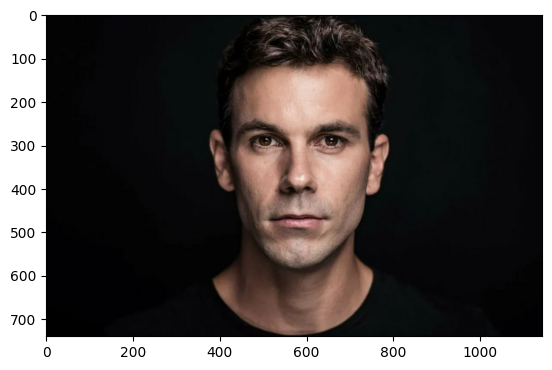

In [6]:
img = cv2.imread('People_anfas.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img[:,:,::-1])

FACE NUMBER: 1
---------------------------
FACE CONFIDENCE: 0.93

FACE BOUNDING BOX: 
xmin: 0.33948386
ymin: 0.25269476
width: 0.3465916
height: 0.53529346

RIGHT_EYE:
x: 0.4393994
y: 0.40549144

LEFT_EYE:
x: 0.5760678
y: 0.40639928

NOSE_TIP:
x: 0.50319993
y: 0.5424489

MOUTH_CENTER:
x: 0.5029412
y: 0.6435336

RIGHT_EAR_TRAGION:
x: 0.37014207
y: 0.44576356

LEFT_EAR_TRAGION:
x: 0.6571229
y: 0.4519132



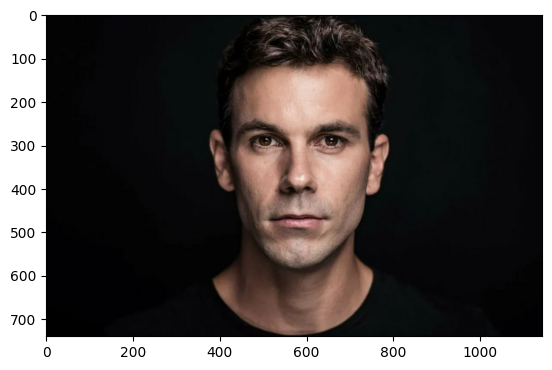

In [7]:
face_detection_results = face_detection.process(img[:,:,::-1])

plt.imshow(img[:,:,::-1])

box_coord = []

if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
        # print(face_no, face)
        print(f'FACE NUMBER: {face_no + 1}')
        print('---------------------------')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        face_data = face.location_data

        print(f'\nFACE BOUNDING BOX: \n{face_data.relative_bounding_box}')
        box_coord.append(face_data.relative_bounding_box.xmin)
        box_coord.append(face_data.relative_bounding_box.ymin)
        box_coord.append(face_data.relative_bounding_box.width)
        box_coord.append(face_data.relative_bounding_box.height)

        for i in range(6):
            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

In [8]:
box_coord

[0.3394838571548462, 0.2526947557926178, 0.346591591835022, 0.535293459892273]

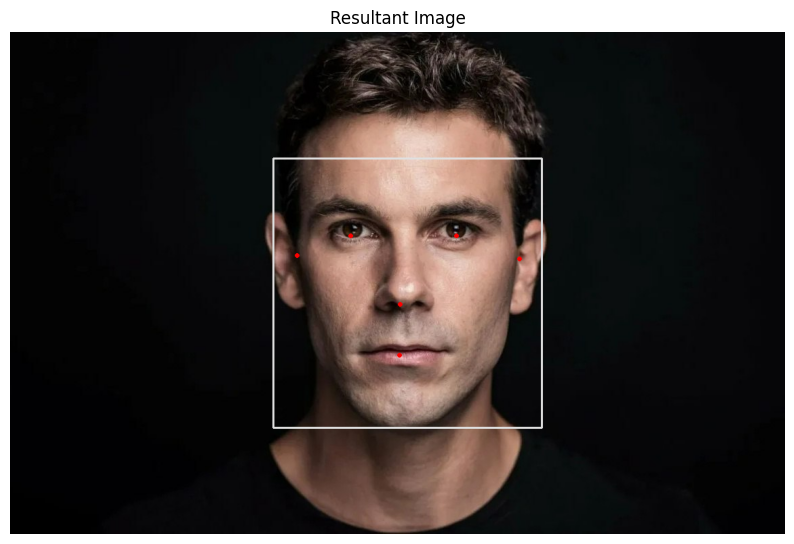

In [9]:
img_copy = img[:,:,::-1].copy()

if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
        mp_drawing.draw_detection(image=img_copy, detection=face, keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=2))

fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image")
plt.axis('off')
plt.imshow(img_copy)
plt.show()

In [10]:
# import matplotlib.patches

# fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(6.4, 3.2))

# plt.imshow(img[:,:,::-1])
# plt.add_patch(matplotlib.patches.Rectangle((box_coord[0], box_coord[1]), box_coord[2], box_coord[3]))

In [11]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, min_detection_confidence=0.5)

face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.3)

mp_drawing_styles = mp.solutions.drawing_styles

In [12]:
face_mesh_results = face_mesh_images.process(img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LEFT_EYEBROW_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYEBROW)))
RIGHT_EYEBROW_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYEBROW)))
# LEFT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_IRIS)))
# RIGHT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_IRIS)))

if face_mesh_results.multi_face_landmarks:
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
        # print(face_no, face)
        print(f'FACE NUMBER: {face_no + 1}')
        print('---------------------------')

        print(f'LEFT EYE LANDMARKS')
        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:3]:
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
        print('---------------------------')

        print(f'RIGHT EYE LANDMARKS')
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:3]:
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])
        print('---------------------------')

        print(f'LEFT EYEBROW LANDMARKS')
        for LEFT_EYEBROW_INDEX in LEFT_EYEBROW_INDEXES[:3]:
            print(face_landmarks.landmark[LEFT_EYEBROW_INDEX])
        print('---------------------------')

        print(f'RIGHT EYEBROW LANDMARKS')
        for RIGHT_EYEBROW_INDEX in RIGHT_EYEBROW_INDEXES[:3]:
            print(face_landmarks.landmark[RIGHT_EYEBROW_INDEX])
        print('---------------------------')

        # print(f'LEFT EYE LANDMARKS')
        # for LEFT_IRIS_INDEX in LEFT_IRIS_INDEXES[:2]:
        #     print(face_landmarks.landmark[LEFT_IRIS_INDEX])
        # print('---------------------------')

        # print(f'RIGHT EYE LANDMARKS')
        # for RIGHT_IRIS_INDEX in RIGHT_IRIS_INDEXES[:2]:
        #     print(face_landmarks.landmark[RIGHT_IRIS_INDEX])
        # print('---------------------------')

        # face_data = face.location_data

        # print(f'\nFACE BOUNDING BOX: \n{face_data.relative_bounding_box}')
        # box_coord.append(face_data.relative_bounding_box.xmin)
        # box_coord.append(face_data.relative_bounding_box.ymin)
        # box_coord.append(face_data.relative_bounding_box.width)
        # box_coord.append(face_data.relative_bounding_box.height)

        # for i in range(6):
        #     print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
        #     print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

FACE NUMBER: 1
---------------------------
LEFT EYE LANDMARKS
x: 0.5549332
y: 0.3862134
z: -0.004238481

x: 0.56588393
y: 0.3792224
z: -0.00739316

x: 0.57699025
y: 0.37793374
z: -0.007360984

---------------------------
RIGHT EYE LANDMARKS
x: 0.4291493
y: 0.382502
z: 0.003122486

x: 0.4165529
y: 0.39737397
z: 0.018025797

x: 0.4227423
y: 0.3888709
z: 0.007934765

---------------------------
LEFT EYEBROW LANDMARKS
x: 0.61304873
y: 0.34140494
z: -0.014560323

x: 0.56163275
y: 0.3558823
z: -0.03402231

x: 0.56432676
y: 0.3373743
z: -0.03824107

---------------------------
RIGHT EYEBROW LANDMARKS
x: 0.45294988
y: 0.35723358
z: -0.029221745

x: 0.45016855
y: 0.33901662
z: -0.033454

x: 0.39264977
y: 0.35856318
z: 0.014989388

---------------------------


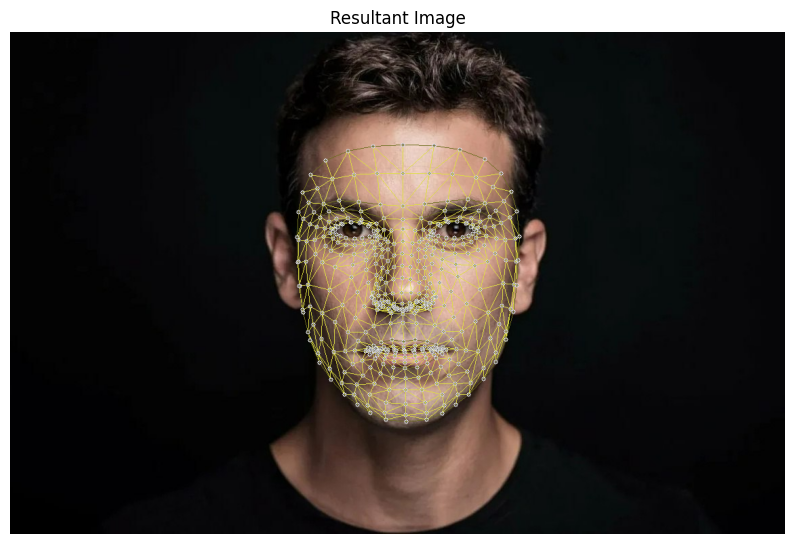

In [13]:
img_copy = img[:,:,::-1].copy()

drawing_spec_l1 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2,color=(255, 255, 255))#, Thickness, circle radius, color
drawing_spec_c1 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=(222, 222, 66))
drawing_spec_l2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2,color=(122, 122, 122))
drawing_spec_c2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=(111, 111, 33))

if face_mesh_results.multi_face_landmarks:
    for face_landmarks in face_mesh_results.multi_face_landmarks:
        # mp_drawing.draw_landmarks(image=img_copy,
        #                           landmark_list=face_landmarks,
        #                           connections=mp_face_mesh.FACEMESH_TESSELATION,
        #                           landmark_drawing_spec=None,
        #                           connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(image=img_copy,
                                  landmark_list=face_landmarks,
                                  connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=drawing_spec_l1,
                                  connection_drawing_spec = drawing_spec_c1)
        
        # mp_drawing.draw_landmarks(image=img_copy,
        #                           landmark_list=face_landmarks,
        #                           connections=mp_face_mesh.FACEMESH_CONTOURS,
        #                           landmark_drawing_spec=None,
        #                           connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style())
        
        mp_drawing.draw_landmarks(image=img_copy,
                                  landmark_list=face_landmarks,
                                  connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=drawing_spec_l2,
                                  connection_drawing_spec = drawing_spec_c2)
        
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image")
plt.axis('off')
plt.imshow(img_copy)
plt.show()

In [24]:
def detectFacialLandmarks(image, face_mesh_images, display=True):
    # image = cv2.imread(image)
    face_mesh_results = face_mesh_images.process(image)

    img_copy = image.copy()

    drawing_spec_l1 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2,color=(255, 255, 255))#, Thickness, circle radius, color
    drawing_spec_c1 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=(222, 222, 66))
    drawing_spec_l2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2,color=(122, 122, 122))
    drawing_spec_c2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color=(111, 111, 33))

    if face_mesh_results.multi_face_landmarks:
        for face_landmarks in face_mesh_results.multi_face_landmarks:
            # mp_drawing.draw_landmarks(image=img_copy,
            #                           landmark_list=face_landmarks,
            #                           connections=mp_face_mesh.FACEMESH_TESSELATION,
            #                           landmark_drawing_spec=None,
            #                           connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style())
            
            mp_drawing.draw_landmarks(image=img_copy,
                                    landmark_list=face_landmarks,
                                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                                    landmark_drawing_spec=drawing_spec_l1,
                                    connection_drawing_spec = drawing_spec_c1)
            
            # mp_drawing.draw_landmarks(image=img_copy,
            #                           landmark_list=face_landmarks,
            #                           connections=mp_face_mesh.FACEMESH_CONTOURS,
            #                           landmark_drawing_spec=None,
            #                           connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style())
            
            mp_drawing.draw_landmarks(image=img_copy,
                                    landmark_list=face_landmarks,
                                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                                    landmark_drawing_spec=drawing_spec_l2,
                                    connection_drawing_spec = drawing_spec_c2)
    if display:    
        fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(6.4, 3.2))

        axs[0].axis('off')
        axs[1].axis('off')
        axs[0].set_title('Original')
        axs[1].set_title('Mesh')
        axs[0].imshow(image[:,:,::-1])
        axs[1].imshow(img_copy)
                
        # fig = plt.figure(figsize = [10, 10])

        # plt.title("Resultant Image")
        # plt.axis('off')
        # plt.imshow(img_copy)
        # plt.show()
    else:
        # LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
        # RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
        # LEFT_EYEBROW_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYEBROW)))
        # RIGHT_EYEBROW_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYEBROW)))
        # LEFT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_IRIS)))
        # RIGHT_IRIS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_IRIS)))
        # FACE_OVAL_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_FACE_OVAL)))
        # LIPS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))
        # result=[]
        # for face_landmarks in face_mesh_results.multi_face_landmarks:
        #     result.append([])
        #     for l in face_landmarks.landmark:
        #         result[-1].append([])
        #         if l.x:
        #             result[-1][-1].append(l.x)
        #         if l.y:
        #             result[-1][-1].append(l.y)
        #         if l.z:
        #             result[-1][-1].append(l.z)
        # return result
        return np.ascontiguousarray(image, dtype=np.uint8), face_mesh_results



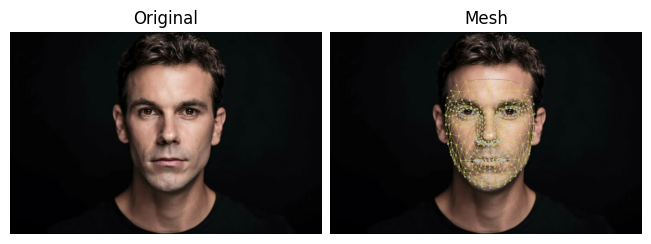

In [16]:
image = cv2.imread('People_anfas.jpg')
detectFacialLandmarks(image, face_mesh_images)

In [17]:
image = cv2.imread('People_anfas.jpg')
detectFacialLandmarks(image, face_mesh_images, False)

(array([[[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [5, 5, 7],
         [5, 5, 7],
         [5, 5, 7]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [5, 5, 7],
         [5, 5, 7],
         [5, 5, 7]],
 
        [[3, 3, 3],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [5, 5, 7],
         [5, 5, 7],
         [5, 5, 7]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 3],
         [1, 1, 3],
         [1, 1, 3]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 3],
         [1, 1, 3],
         [1, 1, 3]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 3],
         [1, 1, 3],
         [1, 1, 3]]], dtype=uint8),
 mediapipe.python.solution_base.SolutionOutputs)

In [25]:
camera_video =cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

time1 = 0

while camera_video.isOpened():
    ok, frame = camera_video.read()

    if not ok:
        continue

    frame = cv2.flip(frame, 1)

    frame, _ = detectFacialLandmarks(frame, face_mesh_videos, display=False)

    time2 = time()

    if (time2 - time1) > 0:
        frames_per_second = 1.0 / (time2 - time1)
        
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    time1 = time2

    cv2.imshow('Face Landmarks Detection', frame)

    k = cv2.waitKey(1) & 0xFF

    if (k == 27):
        break

camera_video.release()
cv2.destroyAllWindows()